#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Practica 1 </font>

##### <font color="#03997A"> Temas 4 y 5: Agrupamiento / Clustering con el método Reglas de Asociación y PCA 
##### Alumno: Ibarra Ramírez Sergio </font>

### Reglas de asociación:  Utilizando el conjunto de datos Online Retail:
https://archive.ics.uci.edu/ml/datasets/online+retail
Obtener el conjunto de artículos frecuentes así como reglas de asociación que se puedan extraer del
mismo

In [1]:
import pandas as pd

retail = pd.read_excel('Online Retail.xlsx')
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Vamos a 'limpiar' un poco la data de retail 

In [2]:
# Drop rows with missing values
retail = retail.dropna()

# Convert the 'Description' column to a factor (categorical) variable
retail['Description'] = retail['Description'].astype('category')

# Convert the 'Country' column to a factor (categorical) variable
retail['Country'] = retail['Country'].astype('category')

# Convert the 'InvoiceDate' column to a date format
retail['Date'] = pd.to_datetime(retail['InvoiceDate'])

# Extract the time from the 'InvoiceDate' column
retail['Time'] = retail['InvoiceDate'].dt.strftime('%H:%M:%S')

# Convert the 'InvoiceNo' column to numeric
retail['InvoiceNo'] = pd.to_numeric(retail['InvoiceNo'], errors='coerce')

# Display the summary of the DataFrame
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  float64       
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  category      
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  category      
 8   Date         406829 non-null  datetime64[ns]
 9   Time         406829 non-null  object        
dtypes: category(2), datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 29.3+ MB
None


In [3]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
1,536365.0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00


#### ¿ A qué hora la gente compra normalmente online? 

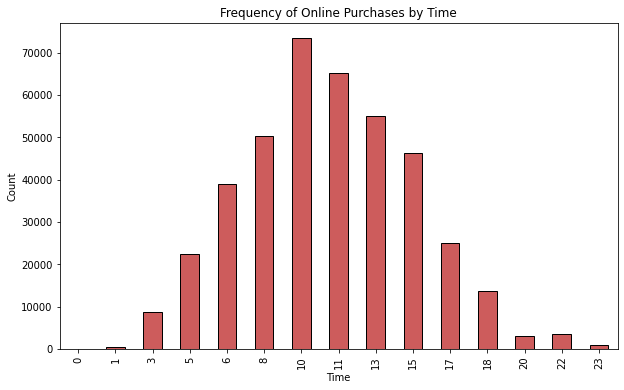

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime type
retail['Time'] = pd.to_datetime(retail['Time'])

# Categorize 'Time' column into 24-hour segments
retail['Time_Category'] = pd.cut(retail['Time'].dt.hour, bins=24, labels=False)

# Plot a histogram of the 'Time_Category' column
plt.figure(figsize=(10, 6))
retail['Time_Category'].value_counts().sort_index().plot(kind='bar', color='indianred', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Frequency of Online Purchases by Time')
plt.xticks(rotation=90)
plt.show()


#### ¿ Cuántos objetos son comprados en promedio por cada cliente? 

In [5]:
# Group by 'InvoiceNo' and calculate the mean of 'Quantity' for each group
n_items = retail.groupby('InvoiceNo')['Quantity'].mean()
n_items.value_counts()

1.000000     279
12.000000    262
10.000000    208
6.000000     168
24.000000    168
            ... 
32.333333      1
19.147059      1
15.392857      1
4.325000       1
13.238095      1
Name: Quantity, Length: 7165, dtype: int64

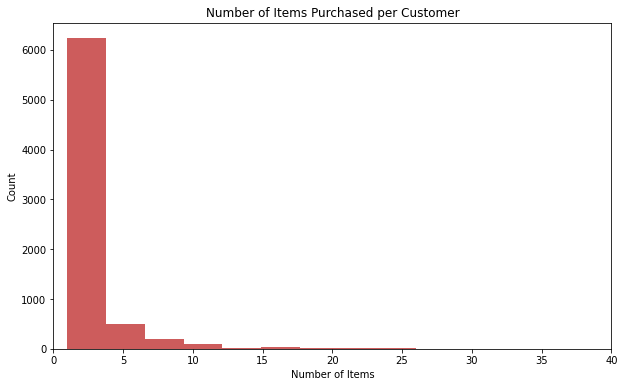

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'InvoiceNo' and calculate the mean of 'Quantity' for each group
n_items = retail.groupby('InvoiceNo')['Quantity'].mean()
n_items_count = n_items.value_counts()
# Plot a histogram of the number of items purchased per customer
plt.figure(figsize=(10, 6))
plt.hist(n_items_count, color='indianred', bins=100)
plt.xlabel('Number of Items')
plt.xlim(0, 40)  # Set the x-axis limits to 0 and 1000
plt.ylabel('Count')
plt.title('Number of Items Purchased per Customer')
plt.axvline(x=80, color='black', linestyle='--')  # Add a vertical line at x=80
plt.show()


¿Cuáles son los 10 artticulos más vendidos? 

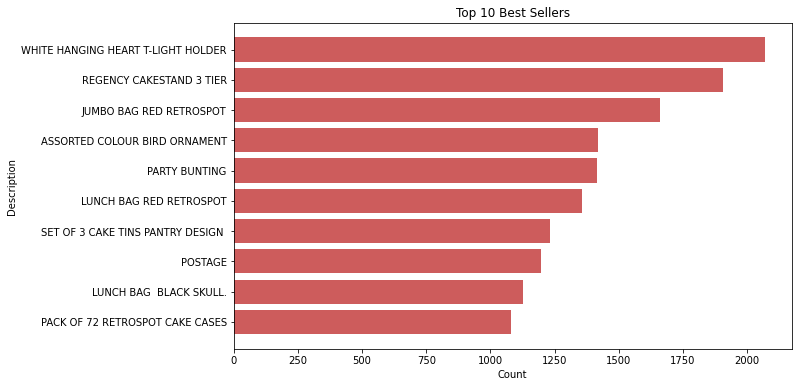

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'StockCode' and 'Description' and calculate the count for each group
top_sellers = retail.groupby(['StockCode', 'Description']).size().reset_index(name='count')

# Sort by descending count
top_sellers = top_sellers.sort_values(by='count', ascending=False)

# Plot the top 10 best sellers
top_10 = top_sellers.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Description'], top_10['count'], color='indianred')
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Best Sellers')
plt.gca().invert_yaxis()  # Invert the y-axis to show highest count at the top
plt.show()


#### Implementando reglas de asociación 

Before using any rule mining algorithm, we need to transform the data from the data frame format, into transactions such that we have all the items bought together in one row.

In [8]:
import pandas as pd

# Sort the retail data by 'CustomerID'
retail_sorted = retail.sort_values(by='CustomerID')

# Group by 'CustomerID' and 'Date' and concatenate the 'Description' values
itemList = retail.groupby(['CustomerID', 'Date'])['Description'].apply(lambda x: ','.join(x)).reset_index()
itemList

,CustomerID,Date,Description
0,12346.0,2011-01-18 10:01:00,MEDIUM CERAMIC TOP STORAGE JAR
1,12346.0,2011-01-18 10:17:00,MEDIUM CERAMIC TOP STORAGE JAR
2,12347.0,2010-12-07 14:57:00,"BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI..."
3,12347.0,2011-01-26 14:30:00,"PINK NEW BAROQUECANDLESTICK CANDLE,BLUE NEW BA..."
4,12347.0,2011-04-07 10:43:00,"AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG ..."
...,...,...,...
22029,18283.0,2011-11-30 12:59:00,"SET OF 6 SNACK LOAF BAKING CASES,10 COLOUR SPA..."
22030,18283.0,2011-12-06 12:02:00,"FELTCRAFT HAIRBAND RED AND BLUE,PACK OF 12 DOL..."
22031,18287.0,2011-05-22 10:39:00,"SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU..."
22032,18287.0,2011-10-12 10:23:00,"HAND WARMER OWL DESIGN,SET OF 3 WOODEN SLEIGH ..."


We only need item transactions, so remove customerID and Date columns.

In [9]:
# Remove 'CustomerID' and 'Date' columns
itemList = itemList.drop(['CustomerID', 'Date'], axis=1)

# Rename the column to "items"
itemList.columns = ['items']


In [10]:
itemList

,items
0,MEDIUM CERAMIC TOP STORAGE JAR
1,MEDIUM CERAMIC TOP STORAGE JAR
2,"BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI..."
3,"PINK NEW BAROQUECANDLESTICK CANDLE,BLUE NEW BA..."
4,"AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG ..."
...,...
22029,"SET OF 6 SNACK LOAF BAKING CASES,10 COLOUR SPA..."
22030,"FELTCRAFT HAIRBAND RED AND BLUE,PACK OF 12 DOL..."
22031,"SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU..."
22032,"HAND WARMER OWL DESIGN,SET OF 3 WOODEN SLEIGH ..."


Write the data fram to a csv file and check whether our transaction format is correct.

In [11]:
# Write the DataFrame to a CSV file
itemList.to_csv('market_basket.csv', index=False, quoting=0)


Let’s have a closer look at how many transactions we have and what they are.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Read the transactions from the CSV file
df = pd.read_csv('market_basket.csv')

# Convert the transaction data to a list of lists
transactions = df['items'].str.split(',')

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# Perform frequent itemset mining
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)





Let´s create some rules and order them 

In [ ]:
# Sort the rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

# Print the summary of the rules
print(rules.describe())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


       antecedent support  consequent support    support  confidence  \
count           22.000000           22.000000  22.000000   22.000000   
mean             0.013073            0.021322   0.012056    0.932579   
std              0.002950            0.010571   0.002100    0.077310   
min              0.010665            0.011391   0.010302    0.819495   
25%              0.011391            0.012231   0.011051    0.851881   
50%              0.011755            0.016452   0.011391    1.000000   
75%              0.012844            0.033267   0.011936    1.000000   
max              0.021376            0.037941   0.018018    1.000000   

            lift   leverage  conviction  zhangs_metric  
count  22.000000  22.000000   22.000000      22.000000  
mean   55.059937   0.011756         inf       0.989252  
std    25.452103   0.001934         NaN       0.011387  
min    21.745799   0.010054    5.430377       0.968912  
25%    26.528704   0.010694    6.508527       0.977463  
50%    57

##### Las reglas de asociación 'más fuertes son'

In [ ]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Inspect the first 10 rules
print(rules.head(12))


                      antecedents                    consequents  \
0      (FANCY FONT BIRTHDAY CARD)                            ( )   
7           (SET 3 RETROSPOT TEA)                        (SUGAR)   
14          (SET 3 RETROSPOT TEA)                (SUGAR, COFFEE)   
13                        (SUGAR)  (COFFEE, SET 3 RETROSPOT TEA)   
12  (COFFEE, SET 3 RETROSPOT TEA)                        (SUGAR)   
1                   ( BACK DOOR )                     (KEY FOB )   
10                (SUGAR, COFFEE)          (SET 3 RETROSPOT TEA)   
11   (SUGAR, SET 3 RETROSPOT TEA)                       (COFFEE)   
6                         (SUGAR)          (SET 3 RETROSPOT TEA)   
4                         (SUGAR)                       (COFFEE)   
3           (SET 3 RETROSPOT TEA)                       (COFFEE)   
2                         ( SHED)                     (KEY FOB )   

    antecedent support  consequent support   support  confidence       lift  \
0             0.011391            0.

##### Conclusión sobre las reglas de asociación: 
- Todos los clientes que compran (SET 3 RETROSPOT TEA) también se llevan (SUGAR, COFFEE)
- Todos los clientes que compran ( SHED)   también se llevan (KEY FOB )

 

##### Vamos graficas las reglas 'mas importantes'

In [ ]:
# Get the top rules
top_rules = rules.head(12)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(FANCY FONT BIRTHDAY CARD),( ),0.011391,0.017745,0.011391,1.0,56.352941,0.011189,inf,0.993573
7,(SET 3 RETROSPOT TEA),(SUGAR),0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
14,(SET 3 RETROSPOT TEA),"(SUGAR, COFFEE)",0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
13,(SUGAR),"(COFFEE, SET 3 RETROSPOT TEA)",0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
12,"(COFFEE, SET 3 RETROSPOT TEA)",(SUGAR),0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
1,( BACK DOOR ),(KEY FOB ),0.010665,0.017201,0.010665,1.0,58.137203,0.010482,inf,0.993394
10,"(SUGAR, COFFEE)",(SET 3 RETROSPOT TEA),0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
11,"(SUGAR, SET 3 RETROSPOT TEA)",(COFFEE),0.011391,0.015703,0.011391,1.0,63.682081,0.011213,inf,0.995639
6,(SUGAR),(SET 3 RETROSPOT TEA),0.011391,0.011391,0.011391,1.0,87.784861,0.011262,inf,1.000000
4,(SUGAR),(COFFEE),0.011391,0.015703,0.011391,1.0,63.682081,0.011213,inf,0.995639


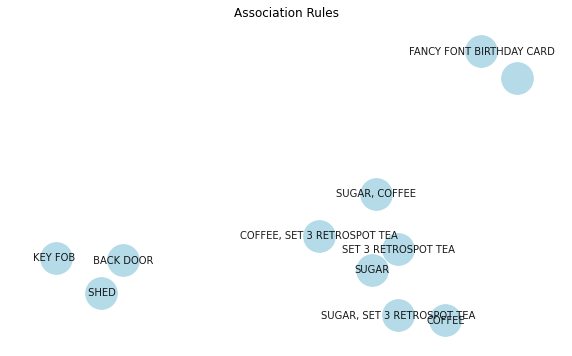

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the association rules
for i in range(len(top_rules)):
    antecedents = ', '.join(top_rules.iloc[i]['antecedents'])
    consequents = ', '.join(top_rules.iloc[i]['consequents'])
    G.add_edge(antecedents, consequents)

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='white', font_size=10, node_size=1000, alpha=0.9)
plt.title('Association Rules')
plt.axis('off')
plt.show()


### Elegir un conjunto de datos del listado: https://data.world/exercises/principal-components-exercise-1 Y aplicar PCA sobre el mismo para obtener las componentes más importantes

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Leemos y exploramos un poco la data de nutrition para PCA 

In [2]:
nutrition_pca = pd.read_csv('nndb_flat.csv')
nutrition_pca.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
nutrition_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Revisemos aquellos elementos que esten 'fuertemente correlacionados'

In [4]:
used = []
corrs = []
for i, j in enumerate(nutrition_pca.corr().columns):
    for k in range(len(nutrition_pca.corr())):
        if ((nutrition_pca.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != nutrition_pca.corr().index[k])):
            
            used.append(j)
            corrs.append((j, nutrition_pca.corr().index[k], 
                          np.round(nutrition_pca.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1.0
1,VitB6_mg,VitB6_USRDA,1.0
2,VitB12_mcg,VitB12_USRDA,1.0
3,VitC_mg,VitC_USRDA,1.0
4,VitE_mg,VitE_USRDA,1.0
5,Folate_mcg,Folate_USRDA,1.0
6,Niacin_mg,Niacin_USRDA,1.0
7,Riboflavin_mg,Riboflavin_USRDA,1.0
8,Thiamin_mg,Thiamin_USRDA,1.0
9,Calcium_mg,Calcium_USRDA,1.0


Se observa que 'las columnas con nombre USRDA pueden ser redudantes' ya que está fuertemente relacionadas con VitA, vitB y vitC 

In [5]:
nutrition_pca.drop(nutrition_pca.columns[nutrition_pca.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

nutrition_pca.head(5)        

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [6]:
nutrition_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

Separaremos aquellas variables que son no numéricas

In [7]:
nutrition_pca.set_index('ID', inplace=True)
nutrition_pca_descrip = nutrition_pca.iloc[:, :6]
nutrition_pca.drop(nutrition_pca.columns[:6].values, axis=1, inplace=True)

nutrition_pca_descrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 1001 to 93600
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FoodGroup       8618 non-null   object
 1   ShortDescrip    8618 non-null   object
 2   Descrip         8618 non-null   object
 3   CommonName      1063 non-null   object
 4   MfgName         1560 non-null   object
 5   ScientificName  732 non-null    object
dtypes: object(6)
memory usage: 471.3+ KB


In [8]:
nutrition_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magn

Vamos a revisar la 'distribución individual' de las variables numéricas en nuestro data  set de nutrition_pca

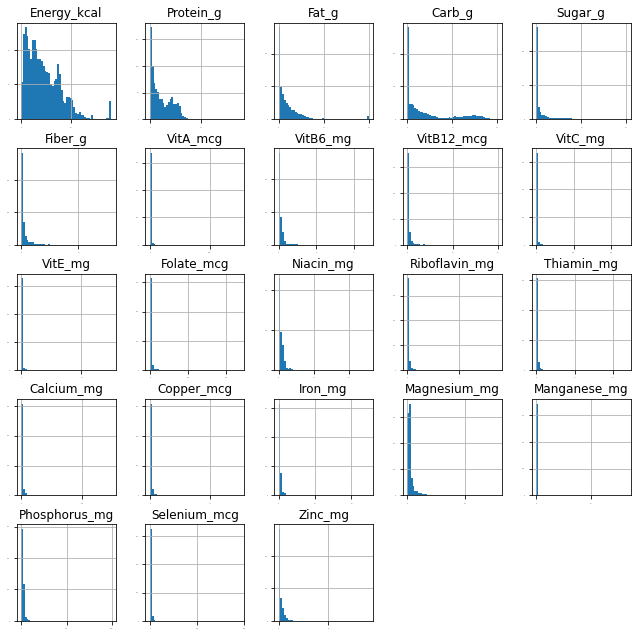

In [9]:
import matplotlib.pyplot as plt

ax = nutrition_pca.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11, 11))
plt.show()


Se puede observar como casi todas las variables tienden a tener muchos valores cercanos a cero, pero al mismo tiempo teninedo 'skeness' a la derecha, por lo que haremos una 'pequeña transformación a los datos' haciendo uso de boxcox de Python

In [10]:
from scipy.stats import boxcox

nutrition_pca = nutrition_pca + 1

nutrition_pca_TF = pd.DataFrame(index=nutrition_pca.index)

for i in nutrition_pca.columns.values:
    nutrition_pca_TF["%s_TF" % i] = boxcox(nutrition_pca.loc[:, i])[0]

nutrition_pca_TF.head(5)


,Energy_kcal_TF,Protein_g_TF,Fat_g_TF,Carb_g_TF,Sugar_g_TF,Fiber_g_TF,VitA_mcg_TF,VitB6_mg_TF,VitB12_mcg_TF,VitC_mg_TF,...,Riboflavin_mg_TF,Thiamin_mg_TF,Calcium_mg_TF,Copper_mcg_TF,Iron_mg_TF,Magnesium_mg_TF,Manganese_mg_TF,Phosphorus_mg_TF,Selenium_mcg_TF,Zinc_mg_TF
ID,,,,,,,,,,,,,,,,,,,,,
1001,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897452,0.674112,0.083954
1002,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
1003,30.599777,0.253858,4.059063,0.000000,0.000000,0.0,2.711488,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
1004,21.085439,4.504850,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739039,2.458809,0.896741
1005,21.527013,4.665389,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962339,2.458809,0.889206


In [11]:
nutrition_pca_TF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Energy_kcal_TF    8618 non-null   float64
 1   Protein_g_TF      8618 non-null   float64
 2   Fat_g_TF          8618 non-null   float64
 3   Carb_g_TF         8618 non-null   float64
 4   Sugar_g_TF        8618 non-null   float64
 5   Fiber_g_TF        8618 non-null   float64
 6   VitA_mcg_TF       8618 non-null   float64
 7   VitB6_mg_TF       8618 non-null   float64
 8   VitB12_mcg_TF     8618 non-null   float64
 9   VitC_mg_TF        8618 non-null   float64
 10  VitE_mg_TF        8618 non-null   float64
 11  Folate_mcg_TF     8618 non-null   float64
 12  Niacin_mg_TF      8618 non-null   float64
 13  Riboflavin_mg_TF  8618 non-null   float64
 14  Thiamin_mg_TF     8618 non-null   float64
 15  Calcium_mg_TF     8618 non-null   float64
 16  Copper_mcg_TF     8618 non-null   floa

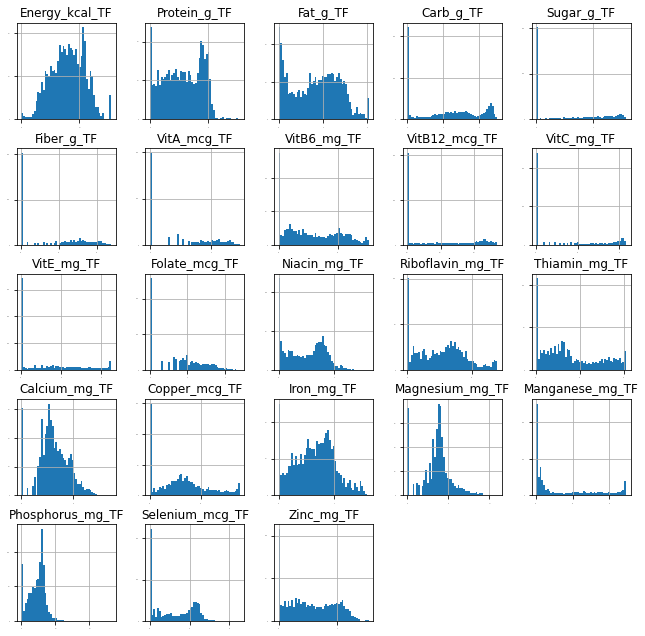

In [12]:
ax = nutrition_pca_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

Se normalizará la data pues PCA se basa en la minimización de la matriz de covarianza y es conveniente que todas las variables tengan una misma escala con media 0 y varianza 1

In [14]:
# from sklearn.preprocessing import StandardScaler
nutrition_pca_TF = StandardScaler().fit_transform(nutrition_pca_TF)

print( "mean: ", np.round(nutrition_pca_TF.mean(), 2))
print( "standard dev: ", np.round(nutrition_pca_TF.std(), 2))

mean:  -0.0
standard dev:  1.0


##### Implementación de algoritmo PCA a la data de nutrution ya estandarizada y normalizada 

Se define y entrena el modelo PCA de la data nutrition

In [16]:
# from sklearn.decomposition import PCA
pca_model = PCA()
pca_model_nutrition = pca_model.fit_transform(nutrition_pca_TF)
pca_model_nutrition

array([[-2.63841405e+00, -1.70251243e+00,  1.28372455e+00, ...,
         1.20971410e-01, -1.93807135e-02, -9.00855603e-01],
       [-2.53793117e+00, -1.55046399e+00,  1.27981556e+00, ...,
         2.68506470e-01,  3.62586433e-03, -8.95689903e-01],
       [-3.75133548e+00, -2.08018975e+00,  2.06793168e+00, ...,
        -1.62701839e-01, -3.22116570e-02, -9.97154123e-01],
       ...,
       [-3.28860011e+00,  6.89373554e-01,  1.81022923e+00, ...,
         5.11991008e-01, -3.50434518e-01, -5.61815380e-01],
       [ 1.78153849e+00, -7.35900964e-01, -1.99994641e+00, ...,
         1.12915685e+00, -7.90341259e-01,  3.83494449e-01],
       [ 1.21057433e+00, -1.20474083e+00, -2.16951014e+00, ...,
         1.66434001e-01, -6.90435951e-01, -4.67142115e-01]])

Se revisan los eigenvalues para encontrar los componentes más importantes

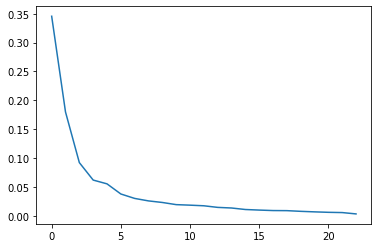

In [18]:
plt.plot(pca_model.explained_variance_ratio_)

In [19]:
print (pca_model.explained_variance_ratio_)
print (pca_model.explained_variance_ratio_[:5].sum())

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
0.7342383069111303


Se observa como únicamente los primeros 5 eigenvalores reflejan alrededor del ~70 de la varianza y serpan esos los que se mantendrán como PC

In [21]:
pca_nutrition = pd.DataFrame(pca_model_nutrition[:, :5], index=nutrition_pca.index)
pca_nutrition_full = pca_nutrition.join(nutrition_pca_descrip)
pca_nutrition_full.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
pca_nutrition_full.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

pca_nutrition_full.head(5)

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,-2.537931,-1.550464,1.279816,3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,-3.751335,-2.080190,2.067932,3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,2.000578,-1.361858,-0.395834,2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,1.582713,-1.321484,-0.238444,2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"
